In [16]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import Ag

resolution = 60 # pixels/μm
a = 0.7 # period
d = a/2 # size 
t = 0.2 # thickness
dpml = 1

sep = 3*a

fcen = 1
fwidth = 0.6
fmax = fcen + fwidth/2
fmin = fcen - fwidth/2
nfreqs = 100

cell = mp.Vector3(a, 2*sep+2*dpml, 0)

Gel = mp.Medium(index=1.5)
Grating = mp.Medium(index=3)
# Grating = Ag

In [17]:
sources = [
    mp.Source(mp.GaussianSource(fcen, fwidth),
        component=mp.Ez,
        center=mp.Vector3(0, -sep+0.1),
        size=mp.Vector3(a, 0)
    )
]

geometry = [
    mp.Block(size=mp.Vector3(mp.inf, mp.inf), center=mp.Vector3(0,0), material=Gel),
    mp.Block(size=mp.Vector3(d, t), center=mp.Vector3(0, 0), material=Grating),
]

pml = [mp.PML(dpml, direction=mp.Y)]

sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml,
    geometry=geometry,
    k_point=mp.Vector3(), # Periodicity
    sources=sources,
    resolution=resolution)

refl = sim.add_mode_monitor(fcen, fwidth, nfreqs, mp.ModeRegion(center=mp.Vector3(0,-sep+0.2), size=mp.Vector3(a, 0)))
tran = sim.add_mode_monitor(fcen, fwidth, nfreqs, mp.ModeRegion(center=mp.Vector3(0,sep-0.2), size=mp.Vector3(a, 0)))

     block, center = (0,0,0)
          size (1e+20,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
     block, center = (0,0,0)
          size (0.35,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (9,9,9)


<AxesSubplot:xlabel='X', ylabel='Y'>

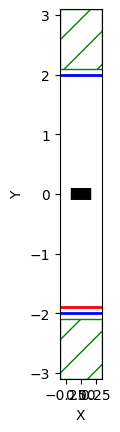

In [18]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(a, 2*sep+2*dpml, 0)))

In [19]:
pt = mp.Vector3(0, sep-0.1)
sim.run(until_after_sources=mp.stop_when_fields_decayed(100, mp.Ez, pt, 1e-9))

-----------
Initializing structure...
time for choose_chunkdivision = 6.8903e-05 s
Working in 2D dimensions.
Computational cell is 0.7 x 6.2 x 0 with resolution 60
     block, center = (0,0,0)
          size (1e+20,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
     block, center = (0,0,0)
          size (0.35,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (9,9,9)
time for set_epsilon = 0.0336719 s
-----------
field decay(t = 100.00833333333333): 0.04335664188016621 / 0.04335664188016621 = 1.0
field decay(t = 200.01666666666665): 3.627913202250946e-06 / 0.04335664188016621 = 8.367606541757007e-05
field decay(t = 300.025): 6.109004870031178e-07 / 0.04335664188016621 = 1.409012461554543e-05
on time step 37875 (time=315.625), 0.000105611 s/step
field decay(t = 400.0333333333333): 2.1378715464294717e-07 / 0.04335664188016621 = 4.930897444360089e-06
field decay(t = 500.0416

     block, center = (0,0,0)
          size (1e+20,1e+20,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
     block, center = (0,0,0)
          size (0.35,0.2,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (9,9,9)


<AxesSubplot:xlabel='X', ylabel='Y'>

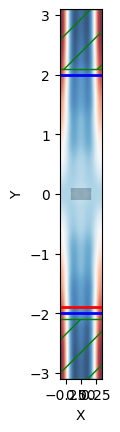

In [20]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(a, 2*sep+2*dpml, 0)), fields=mp.Ez)

In [21]:
refl_flux = mp.get_fluxes(refl)
tran_flux = mp.get_fluxes(tran)
S11 = sim.get_eigenmode_coefficients(refl, [1]).alpha[0]
S21 = sim.get_eigenmode_coefficients(tran, [1]).alpha[0]

MPB solved for frequency_1(0,1.05,0) = 0.7 after 9 iters
Dominant planewave for band 1: (0.000000,1.050000,0.000000)
MPB solved for frequency_1(0,1.05909,0) = 0.706061 after 9 iters
Dominant planewave for band 1: (0.000000,1.059091,0.000000)
MPB solved for frequency_1(0,1.06818,0) = 0.712121 after 9 iters
Dominant planewave for band 1: (0.000000,1.068182,0.000000)
MPB solved for frequency_1(0,1.07727,0) = 0.718182 after 9 iters
Dominant planewave for band 1: (0.000000,1.077273,0.000000)
MPB solved for frequency_1(0,1.08636,0) = 0.724242 after 9 iters
Dominant planewave for band 1: (0.000000,1.086364,0.000000)
MPB solved for frequency_1(0,1.09545,0) = 0.730303 after 9 iters
Dominant planewave for band 1: (0.000000,1.095455,0.000000)
MPB solved for frequency_1(0,1.10455,0) = 0.736364 after 9 iters
Dominant planewave for band 1: (0.000000,1.104545,0.000000)
MPB solved for frequency_1(0,1.11364,0) = 0.742424 after 9 iters
Dominant planewave for band 1: (0.000000,1.113636,0.000000)
MPB solv

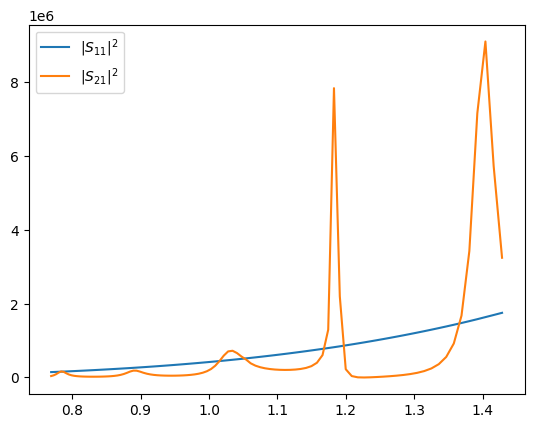

In [22]:
a = np.array([coef[1] for coef in S11])
b = np.array([coef[0] for coef in S21])
c = np.array([coef[0] for coef in S11])

freqs = np.linspace(fmin, fmax, nfreqs)
wl = 1/freqs
plt.plot(wl, np.abs(a/c)**2, label='$|S_{11}|^2$')
plt.plot(wl, np.abs(b/c)**2, label='$|S_{21}|^2$')
plt.legend()